### DATA ANALYSIS: Correlation between ETA of b1, b2 and Genphoton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL as p
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
print(f'Working Directory: {os.getcwd()}')

Working Directory: /teamspace/studios/this_studio


In [3]:
signal_dir = 'Data Preprocessing/data/signal.txt'
background_dir = 'Data Preprocessing/data/background.txt'

signal = pd.read_csv(signal_dir, sep = '\t')
background = pd.read_csv(background_dir, sep = '\t')

In [4]:
# signal.columns

In [5]:
columns = ['jet1_Eta', 'jet2_Eta', 'isophoton_Eta']
signal = signal[columns]
background = background[columns]

In [6]:
print(signal.shape, background.shape) 

(930, 3) (2560, 3)


In [7]:
signal.head()

,jet1_Eta,jet2_Eta,isophoton_Eta
0,-2.17500,-2.07385,-1.975350
1,-1.17886,-1.49040,-0.976183
2,-1.15791,-0.93343,-0.427997
3,1.78497,1.26383,2.016430
4,-2.34558,-1.79176,-0.906079


#### SIGNAL - ORIGINAL DATA

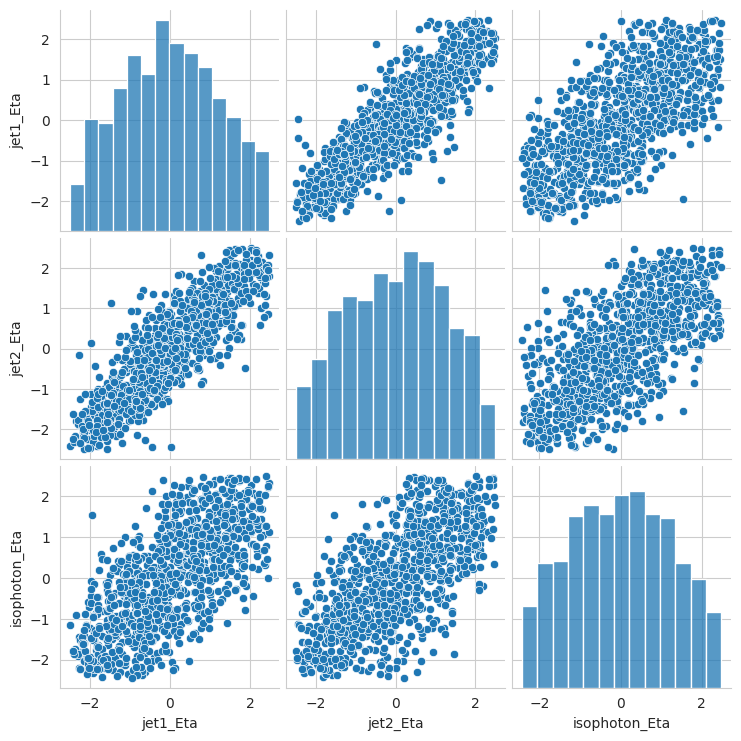

In [8]:
sns.pairplot(data=signal) 

<Axes: >

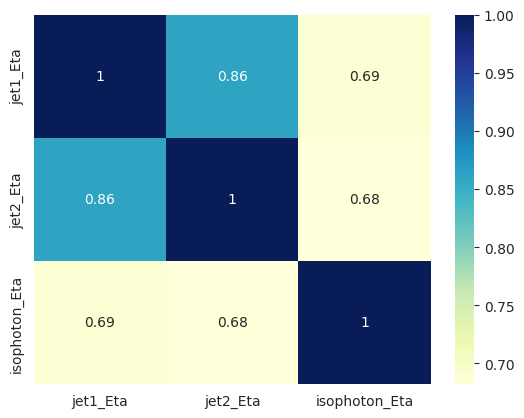

In [9]:
# CORRELATION MATRIX 
sns.heatmap(signal.corr(), annot = True, cmap="YlGnBu")

#### BACKGROUND ORIGINAL DATA

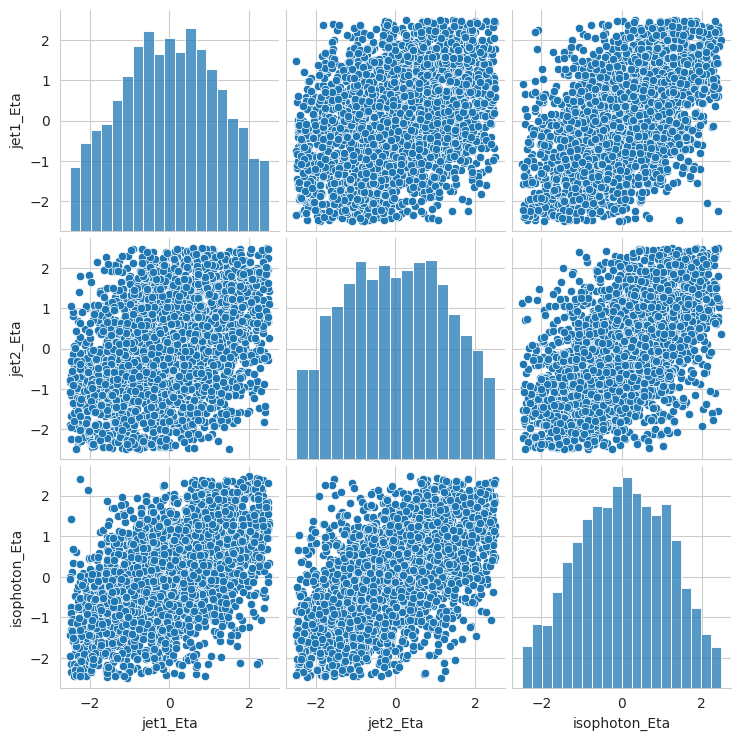

In [10]:
sns.pairplot(data=background) 

<Axes: >

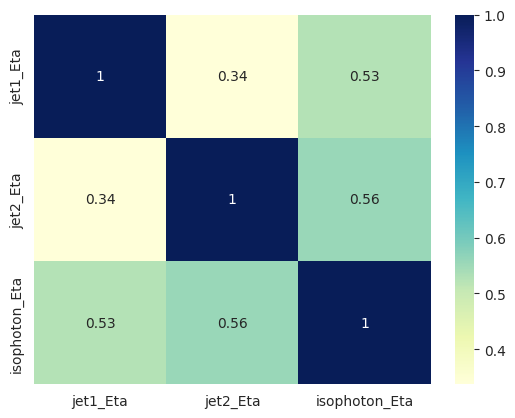

In [11]:
sns.heatmap(background.corr(), annot = True, cmap="YlGnBu")

### DIFFERENCES BETWEEN PHI's

In [12]:
def del_phi(x1: pd.Series, x2: pd.Series):
    x = x1 - x2
    x_transform = x.apply(lambda x: np.abs(2*np.pi - np.abs(x)) if np.abs(x) > np.pi else np.abs(x)) 
    return x_transform

In [13]:
def dels(df:pd.DataFrame):
    df['del_j1_j2'] = del_phi(df['jet1_Eta'], df['jet2_Eta'])
    df['del_j1_iso'] = del_phi(df['jet1_Eta'], df['isophoton_Eta'])
    df['del_j2_iso'] = del_phi(df['jet2_Eta'], df['isophoton_Eta'])
    return df.iloc[:, 3:] 

In [14]:
signal_updated = dels(signal.copy())
background_updated = dels(background.copy()) 

#### FOR SIGNAL

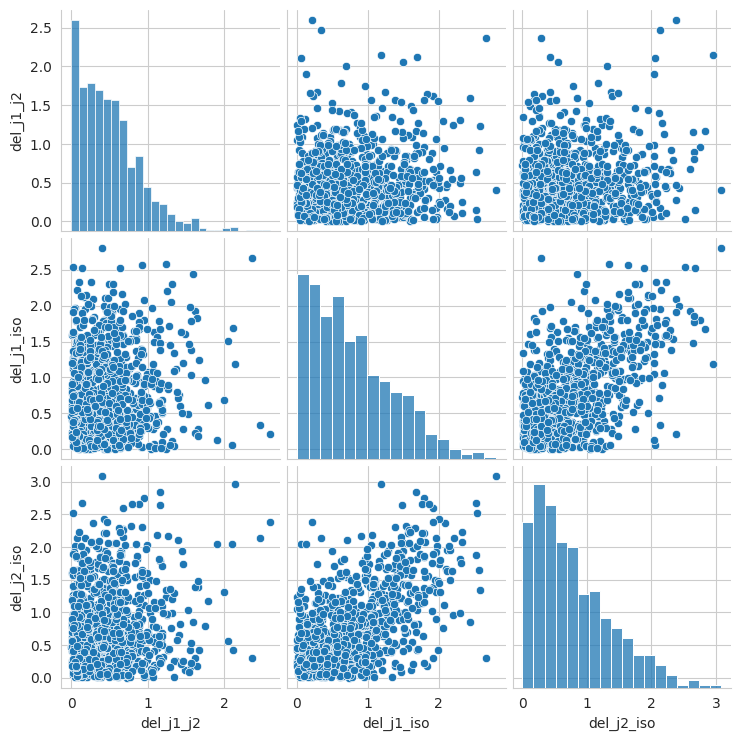

In [15]:
sns.pairplot(data=signal_updated)

<Axes: >

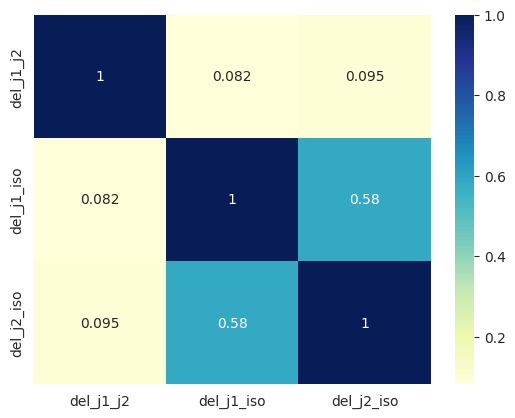

In [16]:
sns.heatmap(signal_updated.corr(), annot = True, cmap="YlGnBu") 

#### FOR BACKGROUND

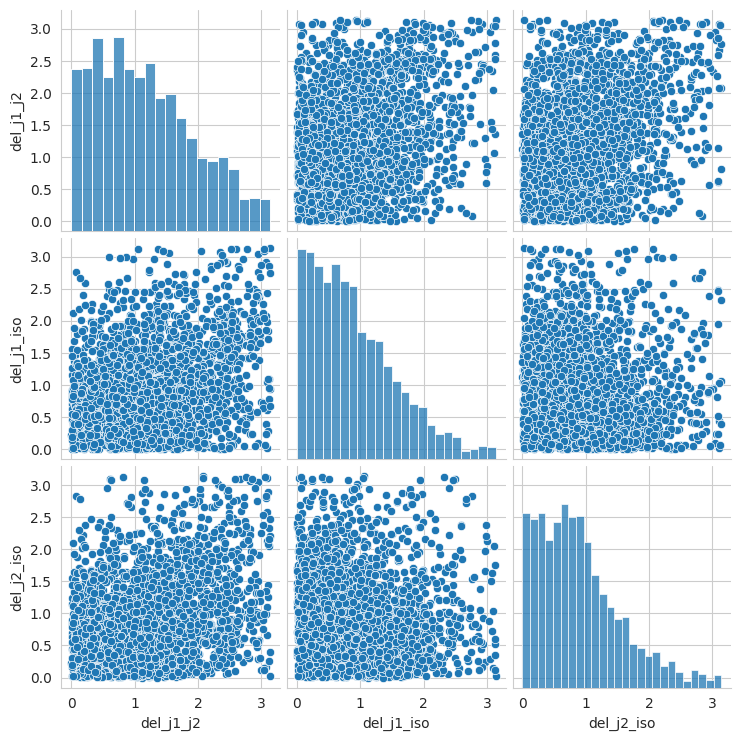

In [17]:
sns.pairplot(data=background_updated) 

<Axes: >

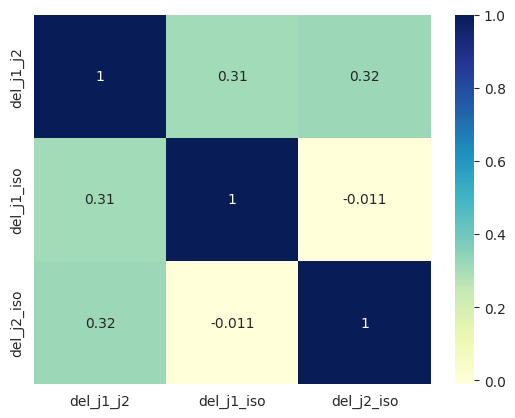

In [18]:
sns.heatmap(background_updated.corr(), annot=True, cmap='YlGnBu')